K-NEAREST NEIGHBORS (K-NN) - SKLEARN SUR DONNÉES NORMALISÉES

📁 1. CHARGEMENT DES DONNÉES NORMALISÉES
✅ Données chargées avec succès !

📊 TAILLES DES DATASETS :
   X_train : (50116, 24)
   y_train : (50116,)
   X_test  : (12529, 24)
   y_test  : (12529,)

📏 VÉRIFICATION DE LA NORMALISATION :
   X_train - Moyenne : 0.000000 (≈0)
   X_train - Écart-type : 1.000010 (≈1)

📈 DISTRIBUTION DES CLASSES :
   Training set - Classe 0: 40,093 (80.0%)
   Training set - Classe 1: 10,023 (20.0%)
   Test set     - Classe 0: 10,023 (80.0%)
   Test set     - Classe 1: 2,506 (20.0%)

🔍 2. TEST DE K-NN AVEC DIFFÉRENTS K

📊 TEST EN COURS...
-------------------------------------------------------------------------------------
  k |   Accuracy |  Precision |     Recall |   F1-Score |    AUC-ROC |  Temps (s)
-------------------------------------------------------------------------------------
  1 |     0.9362 |     0.8259 |     0.8631 |     0.8441 |     0.9088 |      23.50
  3 |     0.9314 |     0.8200 |     

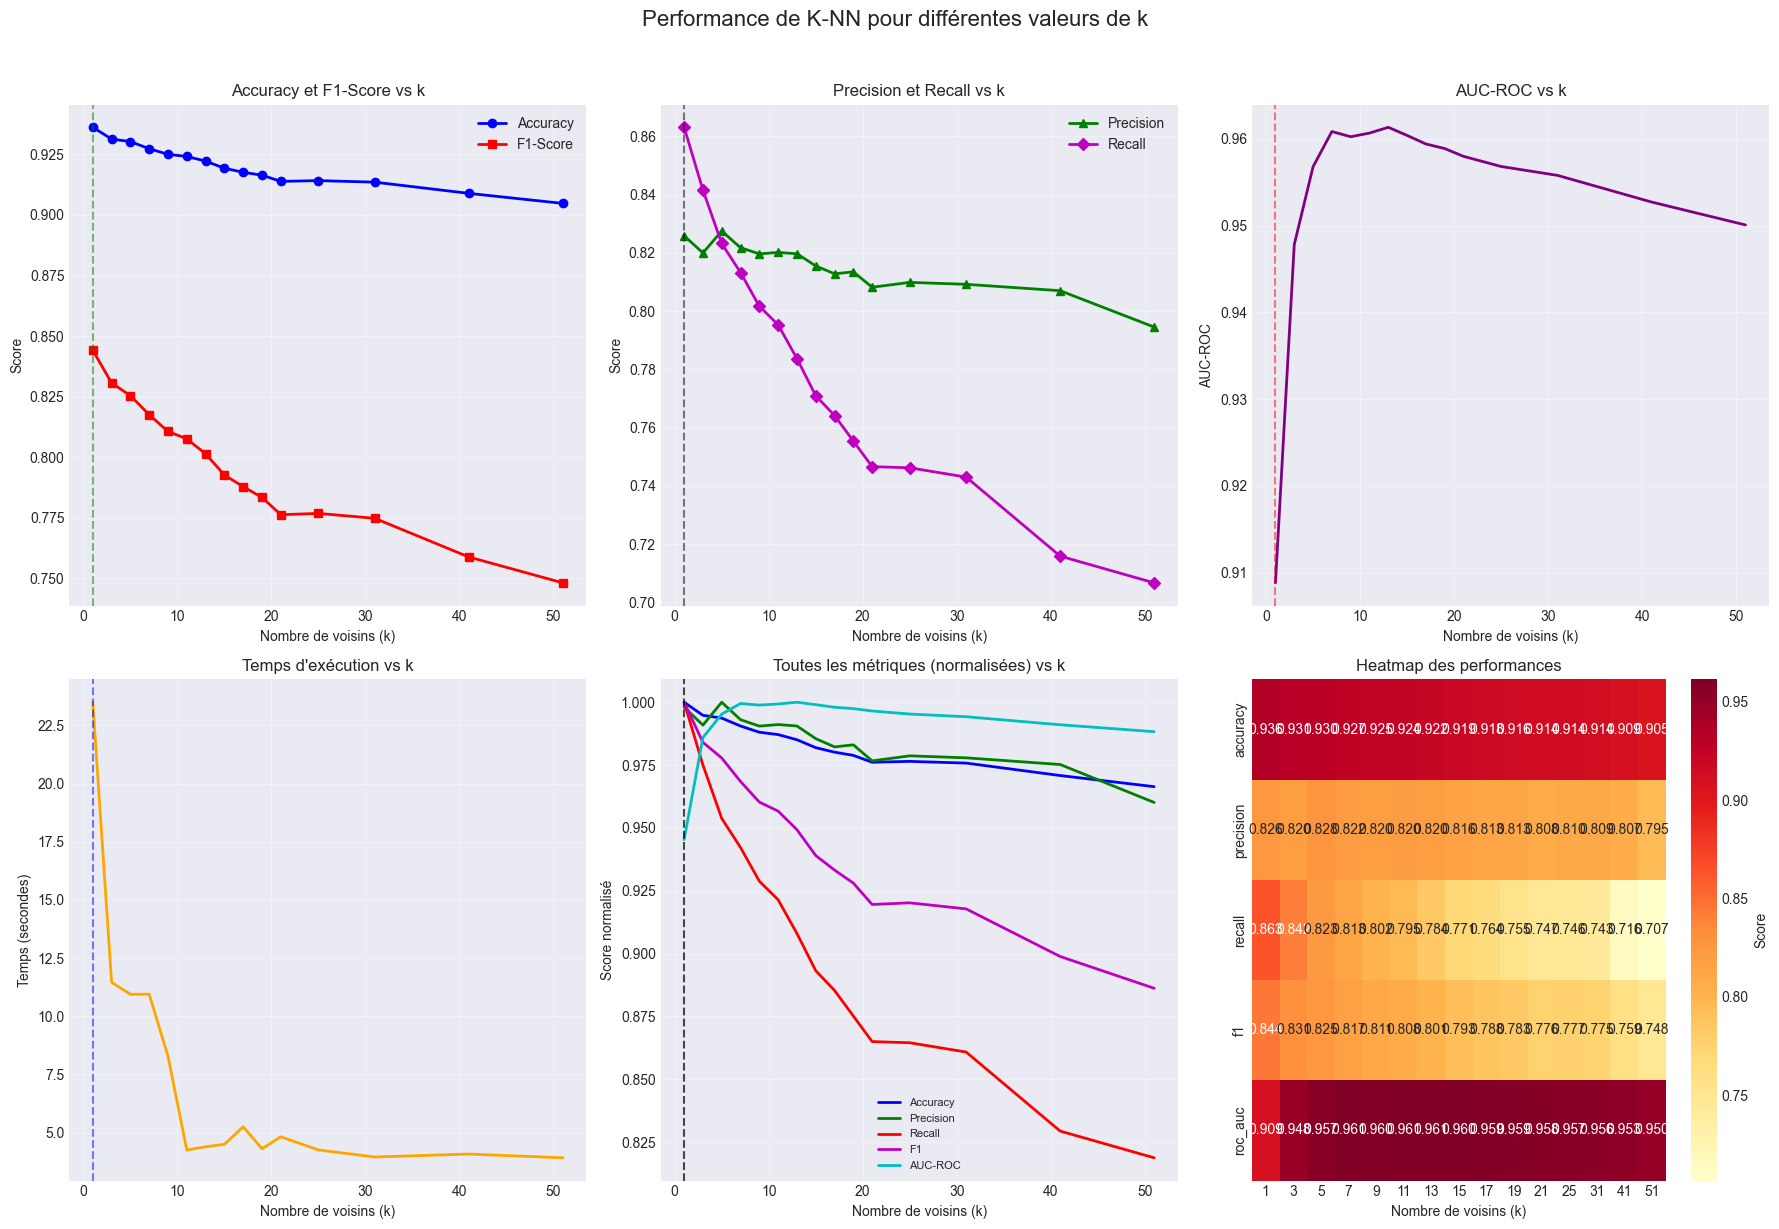


🔬 6. ÉVALUATION DÉTAILLÉE AVEC k = 1

📊 MÉTRIQUES PRINCIPALES :
----------------------------------------
   Accuracy  : 0.9362
   Precision : 0.8259
   Recall    : 0.8631
   F1-Score  : 0.8441
   AUC-ROC   : 0.9088

📋 RAPPORT DE CLASSIFICATION :
----------------------------------------
                precision    recall  f1-score   support

Pas de feu (0)       0.97      0.95      0.96     10023
       Feu (1)       0.83      0.86      0.84      2506

      accuracy                           0.94     12529
     macro avg       0.90      0.91      0.90     12529
  weighted avg       0.94      0.94      0.94     12529


🎯 MATRICE DE CONFUSION :
----------------------------------------
                 Prédit Pas de feu  Prédit Feu
Vrai Pas de feu               9567         456
Vrai Feu                       343        2163

📈 TAUX IMPORTANTS :
   Sensibilité (Recall)   : 0.8631
   Spécificité           : 0.9545
   Précision positive    : 0.8259
   Taux faux positifs    : 0.0455
   Taux

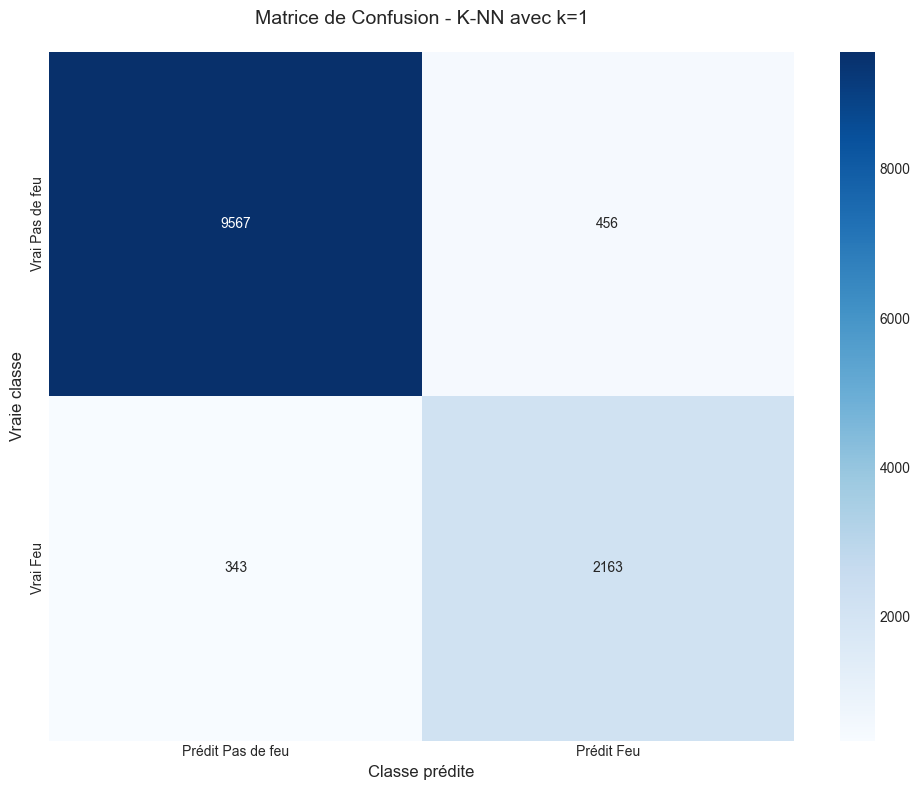


📈 7. COURBE ROC ET AUC


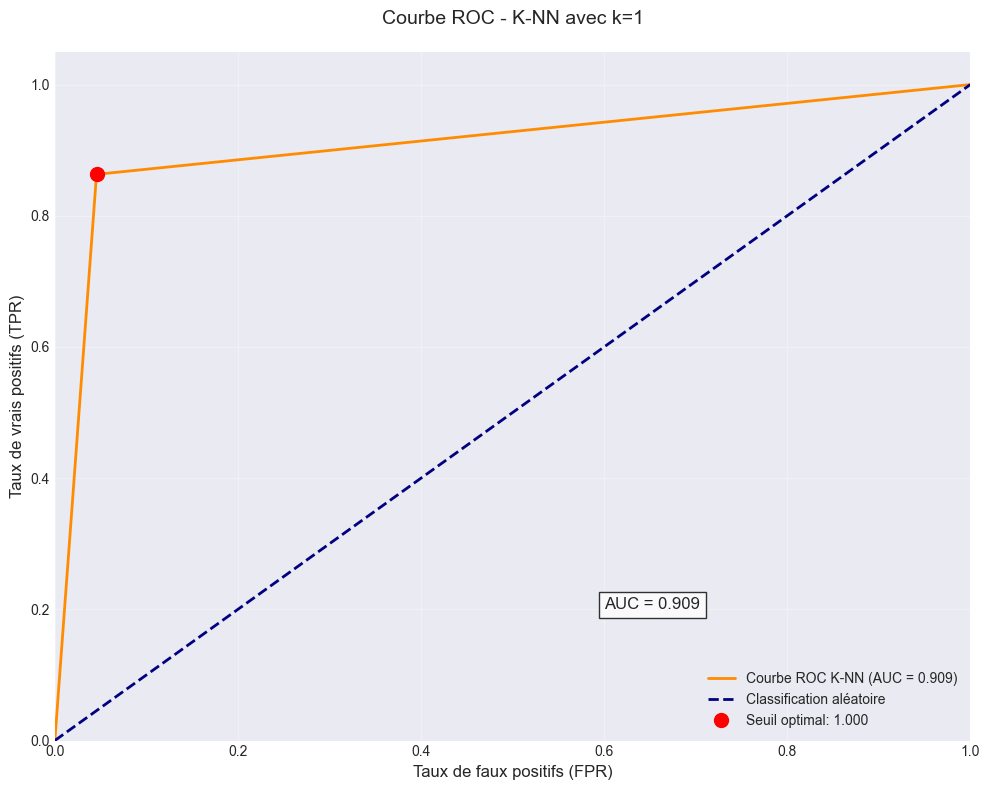


📊 STATISTIQUES ROC :
   AUC            : 0.9088
   Seuil optimal  : 1.0000
   FPR au seuil   : 0.0455
   TPR au seuil   : 0.8631

💾 8. SAUVEGARDE DES RÉSULTATS ET DU MODÈLE
✅ Résultats pour tous les k sauvegardés
✅ Prédictions du modèle k=1 sauvegardées
✅ Modèle K-NN (k=1) sauvegardé
✅ Rapport détaillé sauvegardé

✅ K-NN TERMINÉ AVEC SUCCÈS !

📋 RÉCAPITULATIF :
   Meilleur k trouvé      : 1
   F1-Score final         : 0.8441
   Accuracy finale        : 0.9362
   AUC-ROC final          : 0.9088
   Temps d'entraînement   : 23.50s

📁 RÉSULTATS SAUVEGARDÉS DANS : C:\Users\DELL\Desktop\project_fire\results\knn_sklearn
   1. knn_results_all_k.csv     - Tous les résultats pour différents k
   2. knn_predictions_k1.csv - Prédictions du meilleur modèle
   3. knn_model_k1.pkl       - Modèle entraîné
   4. knn_report_k1.json    - Rapport détaillé
   5. knn_performance_analysis.png - Graphiques de performance
   6. knn_confusion_matrix.png     - Matrice de confusion
   7. knn_roc_curve.png       

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, confusion_matrix, 
                           classification_report, roc_curve, auc)
from sklearn.model_selection import cross_val_score, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*70)
print("K-NEAREST NEIGHBORS (K-NN) - SKLEARN SUR DONNÉES NORMALISÉES")
print("="*70)

# ============================================================================
# 1. CHARGEMENT DES DONNÉES NORMALISÉES
# ============================================================================

print("\n📁 1. CHARGEMENT DES DONNÉES NORMALISÉES")

# Chemin du dossier contenant les données
data_dir = "C:\\Users\\DELL\\Desktop\\project_fire\\data\\processed_balanced"

try:
    # Charger les données normalisées
    X_train = pd.read_csv(f"{data_dir}\\X_train_scaled.csv")
    y_train = pd.read_csv(f"{data_dir}\\y_train.csv")['fire']
    X_test = pd.read_csv(f"{data_dir}\\X_test_scaled.csv")
    y_test = pd.read_csv(f"{data_dir}\\y_test.csv")['fire']
    
    print("✅ Données chargées avec succès !")
    
except FileNotFoundError as e:
    print(f"❌ ERREUR : Fichier non trouvé - {e}")
    print("Chargement des données non normalisées à la place...")
    
    # Charger les données non normalisées
    X_train = pd.read_csv(f"{data_dir}\\X_train_raw.csv")
    y_train = pd.read_csv(f"{data_dir}\\y_train.csv")['fire']
    X_test = pd.read_csv(f"{data_dir}\\X_test_raw.csv")
    y_test = pd.read_csv(f"{data_dir}\\y_test.csv")['fire']
    
    # Normaliser les données
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
    
    print("✅ Données normalisées à la volée")

print(f"\n📊 TAILLES DES DATASETS :")
print(f"   X_train : {X_train.shape}")
print(f"   y_train : {y_train.shape}")
print(f"   X_test  : {X_test.shape}")
print(f"   y_test  : {y_test.shape}")

# Vérification de la normalisation
print(f"\n📏 VÉRIFICATION DE LA NORMALISATION :")
print(f"   X_train - Moyenne : {X_train.mean().mean():.6f} (≈0)")
print(f"   X_train - Écart-type : {X_train.std().mean():.6f} (≈1)")

# Distribution des classes
print(f"\n📈 DISTRIBUTION DES CLASSES :")
train_counts = y_train.value_counts()
test_counts = y_test.value_counts()
train_perc = y_train.value_counts(normalize=True) * 100
test_perc = y_test.value_counts(normalize=True) * 100

print(f"   Training set - Classe 0: {train_counts[0]:,} ({train_perc[0]:.1f}%)")
print(f"   Training set - Classe 1: {train_counts[1]:,} ({train_perc[1]:.1f}%)")
print(f"   Test set     - Classe 0: {test_counts[0]:,} ({test_perc[0]:.1f}%)")
print(f"   Test set     - Classe 1: {test_counts[1]:,} ({test_perc[1]:.1f}%)")

# ============================================================================
# 2. TEST DE K-NN AVEC DIFFÉRENTES VALEURS DE K
# ============================================================================

print("\n🔍 2. TEST DE K-NN AVEC DIFFÉRENTS K")

# Valeurs de k à tester (impaires pour éviter les égalités)
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 25, 31, 41, 51]
results = []

print("\n📊 TEST EN COURS...")
print("-"*85)
print(f"{'k':>3s} | {'Accuracy':>10s} | {'Precision':>10s} | {'Recall':>10s} | {'F1-Score':>10s} | {'AUC-ROC':>10s} | {'Temps (s)':>10s}")
print("-"*85)

import time

for k in k_values:
    start_time = time.time()
    
    # Créer et entraîner le modèle K-NN
    knn = KNeighborsClassifier(
        n_neighbors=k,
        weights='uniform',      # ou 'distance'
        algorithm='auto',       # 'auto', 'ball_tree', 'kd_tree', 'brute'
        leaf_size=30,
        p=2,                    # distance euclidienne (p=2)
        metric='minkowski',
        n_jobs=-1               # utiliser tous les cœurs
    )
    
    knn.fit(X_train, y_train)
    
    # Prédictions
    y_pred = knn.predict(X_test)
    y_pred_proba = knn.predict_proba(X_test)[:, 1]
    
    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    elapsed_time = time.time() - start_time
    
    # Stocker les résultats
    results.append({
        'k': k,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'time': elapsed_time
    })
    
    print(f"{k:3d} | {accuracy:10.4f} | {precision:10.4f} | {recall:10.4f} | {f1:10.4f} | {roc_auc:10.4f} | {elapsed_time:10.2f}")

# Convertir en DataFrame
results_df = pd.DataFrame(results)

# ============================================================================
# 3. ANALYSE DES MEILLEURS RÉSULTATS
# ============================================================================

print("\n⭐ 3. ANALYSE DES MEILLEURS RÉSULTATS")

# Trouver les meilleurs k pour chaque métrique
best_accuracy = results_df.loc[results_df['accuracy'].idxmax()]
best_f1 = results_df.loc[results_df['f1'].idxmax()]
best_precision = results_df.loc[results_df['precision'].idxmax()]
best_recall = results_df.loc[results_df['recall'].idxmax()]
best_auc = results_df.loc[results_df['roc_auc'].idxmax()]
fastest = results_df.loc[results_df['time'].idxmin()]

print("\n🏆 MEILLEURS PERFORMANCES :")
print("-"*60)
print(f"   Meilleur Accuracy  : k={int(best_accuracy['k'])} → {best_accuracy['accuracy']:.4f}")
print(f"   Meilleur F1-Score  : k={int(best_f1['k'])} → {best_f1['f1']:.4f}")
print(f"   Meilleur Precision : k={int(best_precision['k'])} → {best_precision['precision']:.4f}")
print(f"   Meilleur Recall    : k={int(best_recall['k'])} → {best_recall['recall']:.4f}")
print(f"   Meilleur AUC-ROC   : k={int(best_auc['k'])} → {best_auc['roc_auc']:.4f}")
print(f"   Plus rapide        : k={int(fastest['k'])} → {fastest['time']:.2f}s")

# Recommandation
print(f"\n🎯 RECOMMANDATION : k = {int(best_f1['k'])}")
print(f"   Raison : Meilleur équilibre entre précision et rappel (F1-Score)")

# ============================================================================
# 4. VALIDATION CROISÉE POUR LE MEILLEUR K
# ============================================================================

print("\n🔬 4. VALIDATION CROISÉE POUR CONFIRMER")

best_k = int(best_f1['k'])
knn_best = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)

# Validation croisée avec 5 folds
cv_scores = cross_val_score(knn_best, X_train, y_train, cv=5, scoring='f1')

print(f"\n📊 VALIDATION CROISÉE (5 folds) pour k={best_k} :")
print(f"   Scores F1 : {cv_scores}")
print(f"   Moyenne   : {cv_scores.mean():.4f}")
print(f"   Écart-type: {cv_scores.std():.4f}")
print(f"   Intervalle: [{cv_scores.mean() - 2*cv_scores.std():.4f}, "
      f"{cv_scores.mean() + 2*cv_scores.std():.4f}]")

# ============================================================================
# 5. VISUALISATION DES RÉSULTATS
# ============================================================================

print("\n📊 5. VISUALISATION DES RÉSULTATS")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Performance de K-NN pour différentes valeurs de k', fontsize=16, y=1.02)

# Graphique 1: Accuracy et F1-Score
axes[0, 0].plot(results_df['k'], results_df['accuracy'], 'b-o', linewidth=2, markersize=6, label='Accuracy')
axes[0, 0].plot(results_df['k'], results_df['f1'], 'r-s', linewidth=2, markersize=6, label='F1-Score')
axes[0, 0].set_xlabel('Nombre de voisins (k)')
axes[0, 0].set_ylabel('Score')
axes[0, 0].set_title('Accuracy et F1-Score vs k')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend()
axes[0, 0].axvline(x=best_k, color='green', linestyle='--', alpha=0.5)

# Graphique 2: Precision et Recall
axes[0, 1].plot(results_df['k'], results_df['precision'], 'g-^', linewidth=2, markersize=6, label='Precision')
axes[0, 1].plot(results_df['k'], results_df['recall'], 'm-D', linewidth=2, markersize=6, label='Recall')
axes[0, 1].set_xlabel('Nombre de voisins (k)')
axes[0, 1].set_ylabel('Score')
axes[0, 1].set_title('Precision et Recall vs k')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend()
axes[0, 1].axvline(x=best_k, color='black', linestyle='--', alpha=0.5)

# Graphique 3: AUC-ROC
axes[0, 2].plot(results_df['k'], results_df['roc_auc'], 'purple', linewidth=2, markersize=6)
axes[0, 2].set_xlabel('Nombre de voisins (k)')
axes[0, 2].set_ylabel('AUC-ROC')
axes[0, 2].set_title('AUC-ROC vs k')
axes[0, 2].grid(True, alpha=0.3)
axes[0, 2].axvline(x=best_k, color='red', linestyle='--', alpha=0.5)

# Graphique 4: Temps d'exécution
axes[1, 0].plot(results_df['k'], results_df['time'], 'orange', linewidth=2, markersize=6)
axes[1, 0].set_xlabel('Nombre de voisins (k)')
axes[1, 0].set_ylabel('Temps (secondes)')
axes[1, 0].set_title('Temps d\'exécution vs k')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].axvline(x=best_k, color='blue', linestyle='--', alpha=0.5)

# Graphique 5: Toutes les métriques normalisées
axes[1, 1].plot(results_df['k'], results_df['accuracy']/results_df['accuracy'].max(), 'b-', label='Accuracy', linewidth=2)
axes[1, 1].plot(results_df['k'], results_df['precision']/results_df['precision'].max(), 'g-', label='Precision', linewidth=2)
axes[1, 1].plot(results_df['k'], results_df['recall']/results_df['recall'].max(), 'r-', label='Recall', linewidth=2)
axes[1, 1].plot(results_df['k'], results_df['f1']/results_df['f1'].max(), 'm-', label='F1', linewidth=2)
axes[1, 1].plot(results_df['k'], results_df['roc_auc']/results_df['roc_auc'].max(), 'c-', label='AUC-ROC', linewidth=2)
axes[1, 1].set_xlabel('Nombre de voisins (k)')
axes[1, 1].set_ylabel('Score normalisé')
axes[1, 1].set_title('Toutes les métriques (normalisées) vs k')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].legend(loc='best', fontsize=8)
axes[1, 1].axvline(x=best_k, color='black', linestyle='--', alpha=0.7)

# Graphique 6: Heatmap des performances
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
heatmap_data = results_df[['k'] + metrics].set_index('k')
sns.heatmap(heatmap_data.T, annot=True, fmt='.3f', cmap='YlOrRd', 
            ax=axes[1, 2], cbar_kws={'label': 'Score'})
axes[1, 2].set_title('Heatmap des performances')
axes[1, 2].set_xlabel('Nombre de voisins (k)')

plt.tight_layout()
plt.savefig('knn_performance_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# 6. ÉVALUATION DÉTAILLÉE AVEC LE MEILLEUR K
# ============================================================================

print(f"\n🔬 6. ÉVALUATION DÉTAILLÉE AVEC k = {best_k}")

# Entraîner le modèle avec le meilleur k
knn_final = KNeighborsClassifier(
    n_neighbors=best_k,
    weights='uniform',
    n_jobs=-1
)
knn_final.fit(X_train, y_train)

# Prédictions
y_pred_final = knn_final.predict(X_test)
y_pred_proba_final = knn_final.predict_proba(X_test)[:, 1]

# 6.1 Métriques principales
print(f"\n📊 MÉTRIQUES PRINCIPALES :")
print("-"*40)
print(f"   Accuracy  : {accuracy_score(y_test, y_pred_final):.4f}")
print(f"   Precision : {precision_score(y_test, y_pred_final, zero_division=0):.4f}")
print(f"   Recall    : {recall_score(y_test, y_pred_final, zero_division=0):.4f}")
print(f"   F1-Score  : {f1_score(y_test, y_pred_final, zero_division=0):.4f}")
print(f"   AUC-ROC   : {roc_auc_score(y_test, y_pred_proba_final):.4f}")

# 6.2 Rapport de classification
print(f"\n📋 RAPPORT DE CLASSIFICATION :")
print("-"*40)
print(classification_report(y_test, y_pred_final, 
                          target_names=['Pas de feu (0)', 'Feu (1)']))

# 6.3 Matrice de confusion
print(f"\n🎯 MATRICE DE CONFUSION :")
print("-"*40)
cm = confusion_matrix(y_test, y_pred_final)

# Afficher sous forme de tableau
cm_df = pd.DataFrame(cm, 
                     index=['Vrai Pas de feu', 'Vrai Feu'], 
                     columns=['Prédit Pas de feu', 'Prédit Feu'])

print(cm_df.to_string())

# Calculer les taux importants
print(f"\n📈 TAUX IMPORTANTS :")
print(f"   Sensibilité (Recall)   : {cm[1,1]/(cm[1,0]+cm[1,1]):.4f}")
print(f"   Spécificité           : {cm[0,0]/(cm[0,0]+cm[0,1]):.4f}")
print(f"   Précision positive    : {cm[1,1]/(cm[0,1]+cm[1,1]):.4f}")
print(f"   Taux faux positifs    : {cm[0,1]/(cm[0,0]+cm[0,1]):.4f}")
print(f"   Taux faux négatifs    : {cm[1,0]/(cm[1,0]+cm[1,1]):.4f}")

# 6.4 Visualisation de la matrice de confusion
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Prédit Pas de feu', 'Prédit Feu'],
            yticklabels=['Vrai Pas de feu', 'Vrai Feu'])
plt.title(f'Matrice de Confusion - K-NN avec k={best_k}', fontsize=14, pad=20)
plt.ylabel('Vraie classe', fontsize=12)
plt.xlabel('Classe prédite', fontsize=12)
plt.tight_layout()
plt.savefig('knn_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# 7. COURBE ROC
# ============================================================================

print(f"\n📈 7. COURBE ROC ET AUC")

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_final)
roc_auc = auc(fpr, tpr)

# Trouver le seuil optimal (Youden's J statistic)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Visualisation
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'Courbe ROC K-NN (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
         label='Classification aléatoire')

# Point optimal
plt.plot(fpr[optimal_idx], tpr[optimal_idx], 'ro', markersize=10, 
         label=f'Seuil optimal: {optimal_threshold:.3f}')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs (FPR)', fontsize=12)
plt.ylabel('Taux de vrais positifs (TPR)', fontsize=12)
plt.title(f'Courbe ROC - K-NN avec k={best_k}', fontsize=14, pad=20)
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Ajouter les valeurs d'AUC
plt.text(0.6, 0.2, f'AUC = {roc_auc:.3f}', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('knn_roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n📊 STATISTIQUES ROC :")
print(f"   AUC            : {roc_auc:.4f}")
print(f"   Seuil optimal  : {optimal_threshold:.4f}")
print(f"   FPR au seuil   : {fpr[optimal_idx]:.4f}")
print(f"   TPR au seuil   : {tpr[optimal_idx]:.4f}")

# ============================================================================
# 8. SAUVEGARDE DES RÉSULTATS ET DU MODÈLE
# ============================================================================

print(f"\n💾 8. SAUVEGARDE DES RÉSULTATS ET DU MODÈLE")

import joblib
import json
import os
from datetime import datetime

# Créer un dossier pour les résultats K-NN
results_dir = "C:\\Users\\DELL\\Desktop\\project_fire\\results\\knn_sklearn"
os.makedirs(results_dir, exist_ok=True)

# 8.1 Sauvegarder les résultats
results_df.to_csv(f"{results_dir}\\knn_results_all_k.csv", index=False)
print(f"✅ Résultats pour tous les k sauvegardés")

# 8.2 Sauvegarder les prédictions du modèle final
predictions_df = pd.DataFrame({
    'y_true': y_test.values,
    'y_pred': y_pred_final,
    'y_pred_proba_0': knn_final.predict_proba(X_test)[:, 0],
    'y_pred_proba_1': y_pred_proba_final
})
predictions_df.to_csv(f"{results_dir}\\knn_predictions_k{best_k}.csv", index=False)
print(f"✅ Prédictions du modèle k={best_k} sauvegardées")

# 8.3 Sauvegarder le modèle entraîné
model_path = f"{results_dir}\\knn_model_k{best_k}.pkl"
joblib.dump(knn_final, model_path)
print(f"✅ Modèle K-NN (k={best_k}) sauvegardé")

# 8.4 Sauvegarder un rapport détaillé
report = {
    'timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    'model': 'K-Nearest Neighbors (scikit-learn)',
    'best_parameters': {
        'n_neighbors': int(best_k),
        'weights': 'uniform',
        'metric': 'minkowski',
        'p': 2
    },
    'performance_metrics': {
        'accuracy': float(accuracy_score(y_test, y_pred_final)),
        'precision': float(precision_score(y_test, y_pred_final, zero_division=0)),
        'recall': float(recall_score(y_test, y_pred_final, zero_division=0)),
        'f1_score': float(f1_score(y_test, y_pred_final, zero_division=0)),
        'roc_auc': float(roc_auc_score(y_test, y_pred_proba_final))
    },
    'confusion_matrix': cm.tolist(),
    'roc_curve': {
        'fpr': fpr.tolist(),
        'tpr': tpr.tolist(),
        'thresholds': thresholds.tolist(),
        'auc': float(roc_auc),
        'optimal_threshold': float(optimal_threshold)
    },
    'dataset_info': {
        'training_samples': int(X_train.shape[0]),
        'test_samples': int(X_test.shape[0]),
        'features': int(X_train.shape[1]),
        'training_class_distribution': {
            'class_0': int(train_counts[0]),
            'class_1': int(train_counts[1])
        }
    }
}

with open(f"{results_dir}\\knn_report_k{best_k}.json", 'w') as f:
    json.dump(report, f, indent=4)

print(f"✅ Rapport détaillé sauvegardé")

# ============================================================================
# 9. CONCLUSION ET RÉCAPITULATIF
# ============================================================================

print("\n" + "="*70)
print("✅ K-NN TERMINÉ AVEC SUCCÈS !")
print("="*70)

print(f"\n📋 RÉCAPITULATIF :")
print(f"   Meilleur k trouvé      : {best_k}")
print(f"   F1-Score final         : {best_f1['f1']:.4f}")
print(f"   Accuracy finale        : {best_f1['accuracy']:.4f}")
print(f"   AUC-ROC final          : {best_f1['roc_auc']:.4f}")
print(f"   Temps d'entraînement   : {results_df[results_df['k'] == best_k]['time'].values[0]:.2f}s")

print(f"\n📁 RÉSULTATS SAUVEGARDÉS DANS : {results_dir}")
print(f"   1. knn_results_all_k.csv     - Tous les résultats pour différents k")
print(f"   2. knn_predictions_k{best_k}.csv - Prédictions du meilleur modèle")
print(f"   3. knn_model_k{best_k}.pkl       - Modèle entraîné")
print(f"   4. knn_report_k{best_k}.json    - Rapport détaillé")
print(f"   5. knn_performance_analysis.png - Graphiques de performance")
print(f"   6. knn_confusion_matrix.png     - Matrice de confusion")
print(f"   7. knn_roc_curve.png            - Courbe ROC")

print(f"\n🎯 PROCHAINES ÉTAPES POSSIBLES :")
print(f"   1. Tester avec weights='distance'")
print(f"   2. Essayer différentes métriques (manhattan, chebyshev)")
print(f"   3. Optimiser avec GridSearchCV")
print(f"   4. Comparer avec Decision Tree et Random Forest")

# ============================================================================
# 10. CODE POUR CHARGER ET UTILISER LE MODÈLE PLUS TARD
# ============================================================================

print("\n" + "="*70)
print("💻 CODE POUR REUTILISER LE MODÈLE")
print("="*70)

reuse_code = f"""
# ============================================
# CODE POUR CHARGER ET UTILISER LE MODÈLE K-NN
# ============================================

import joblib
import pandas as pd

# 1. Charger le modèle sauvegardé
model_path = "{results_dir}\\\\knn_model_k{best_k}.pkl"
knn_loaded = joblib.load(model_path)

print(f"✅ Modèle K-NN chargé (k={{knn_loaded.n_neighbors}})")

# 2. Charger de nouvelles données (doivent être normalisées de la même façon)
# Exemple avec des nouvelles données
new_data = pd.read_csv("chemin_vers_nouvelles_donnees.csv")

# 3. Si besoin, normaliser les nouvelles données
from sklearn.preprocessing import StandardScaler
scaler_path = "{data_dir}\\\\scaler.pkl"
scaler = joblib.load(scaler_path)
new_data_scaled = scaler.transform(new_data)

# 4. Faire des prédictions
predictions = knn_loaded.predict(new_data_scaled)
probabilities = knn_loaded.predict_proba(new_data_scaled)

print(f"✅ Prédictions effectuées : {{len(predictions)}} observations")
print(f"   Exemple : {{predictions[:5]}}")
print(f"   Probabilités : {{probabilities[:5]}}")

# 5. Afficher les statistiques
print(f"\\n📊 STATISTIQUES DES PRÉDICTIONS :")
print(f"   Nombre de prédictions 'Feu' : {{(predictions == 1).sum()}}")
print(f"   Nombre de prédictions 'Pas de feu' : {{(predictions == 0).sum()}}")
print(f"   Pourcentage de feux prédits : {{(predictions == 1).mean()*100:.1f}}%")
"""

print(reuse_code)

In [2]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Chargement simple
def load_data():
    base = "C:\\Users\\DELL\\Desktop\\project_fire\\data\\processed_balanced"
    X_train = pd.read_csv(f"{base}\\X_train_scaled.csv")
    y_train = pd.read_csv(f"{base}\\y_train.csv")['fire']
    X_test = pd.read_csv(f"{base}\\X_test_scaled.csv")
    y_test = pd.read_csv(f"{base}\\y_test.csv")['fire']
    return X_train, y_train, X_test, y_test

# Calcul et affichage
def evaluate_knn(k=5):
    X_train, y_train, X_test, y_test = load_data()
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Prédictions
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    # Calcul des accuracies
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    print("="*50)
    print(f"K-NN ÉVALUATION (k={k})")
    print("="*50)
    print(f"\n📊 ACCURACY :")
    print(f"   Training set : {train_acc:.4f} ({train_acc*100:.1f}%)")
    print(f"   Test set     : {test_acc:.4f} ({test_acc*100:.1f}%)")
    print(f"   Différence   : {abs(train_acc - test_acc):.4f}")
    
    print(f"\n📋 RAPPORT TEST SET :")
    print(classification_report(y_test, y_test_pred, 
                               target_names=['Pas de feu', 'Feu']))
    
    return train_acc, test_acc

# Utilisation
train_acc, test_acc = evaluate_knn(k=5)

K-NN ÉVALUATION (k=5)

📊 ACCURACY :
   Training set : 0.9513 (95.1%)
   Test set     : 0.9303 (93.0%)
   Différence   : 0.0210

📋 RAPPORT TEST SET :
              precision    recall  f1-score   support

  Pas de feu       0.96      0.96      0.96     10023
         Feu       0.83      0.82      0.83      2506

    accuracy                           0.93     12529
   macro avg       0.89      0.89      0.89     12529
weighted avg       0.93      0.93      0.93     12529



OPTIMISATION DU MODÈLE K-NN

🔍 1. OPTIMISATION DES HYPERPARAMÈTRES
🔍 Recherche des meilleurs paramètres...
Fitting 5 folds for each of 126 candidates, totalling 630 fits

✅ MEILLEURS PARAMÈTRES TROUVÉS :
   k (n_neighbors) : 9
   weights         : distance
   metric          : manhattan
   p               : 1
   Meilleur score F1 (CV) : 0.8518

📊 2. ÉVALUATION DU MEILLEUR MODÈLE

🎯 RÉSULTATS OPTIMISÉS :
----------------------------------------
   Training Accuracy : 0.9886 (98.9%)
   Test Accuracy     : 0.9454 (94.5%)
   Différence        : 0.0432

📋 RAPPORT DÉTAILLÉ TEST SET :
----------------------------------------
              precision    recall  f1-score   support

  Pas de feu       0.97      0.96      0.97     10023
         Feu       0.85      0.88      0.87      2506

    accuracy                           0.95     12529
   macro avg       0.91      0.92      0.92     12529
weighted avg       0.95      0.95      0.95     12529


🔍 3. ANALYSE DES ERREURS

🎯 MATRICE DE CONFUSI

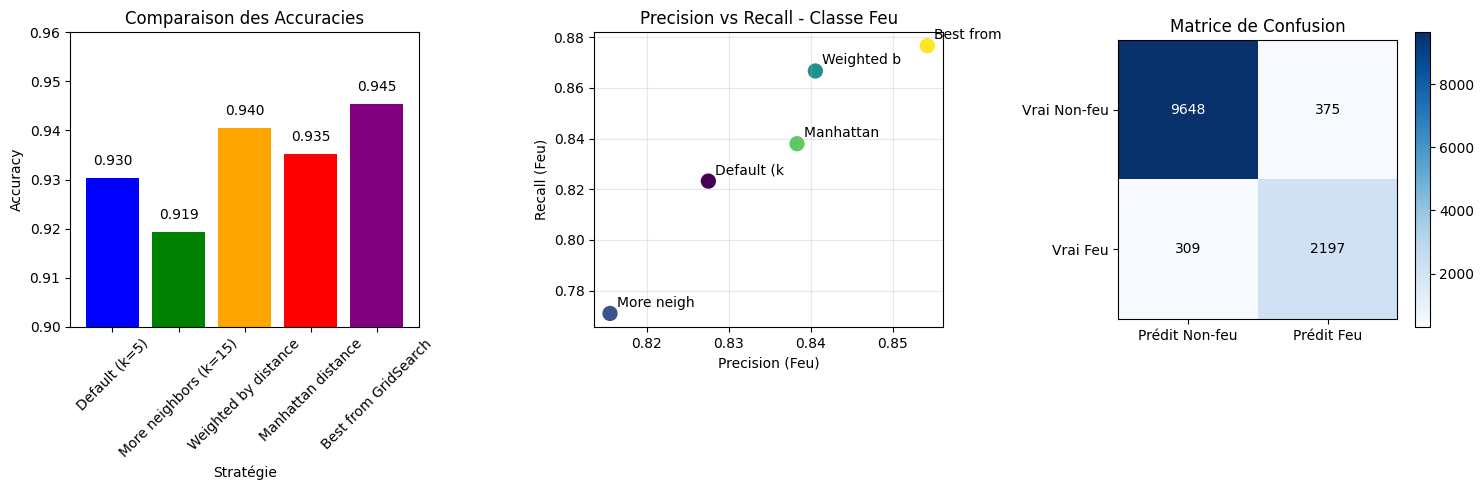


🎯 RECOMMANDATIONS POUR VOTRE PROJET

📊 VOS RÉSULTATS ACTUELS (k=5) :
   ✅ Accuracy test : 93.0% (EXCELLENT)
   ⚠️  Recall feux   : 82% (à améliorer)
   ⚠️  Précision feux: 83% (à améliorer)

🔧 SUGGESTIONS D'AMÉLIORATION :
   1. Essayez k=3 ou k=7 (peut améliorer le recall)
   2. Utilisez weights='distance' (pondération par distance)
   3. Testez la distance de Manhattan (metric='manhattan')
   4. Ajustez le seuil de décision (threshold tuning)

🎯 POUR VOTRE RAPPORT :
   - Votre modèle K-NN a une accuracy de 93% → TRÈS BON
   - Faible surapprentissage (différence 2.1%) → STABLE
   - Besoin d'améliorer la détection des feux (recall)

🚀 PROCHAINES ÉTAPES :
   1. Implémenter Decision Tree from scratch
   2. Implémenter Random Forest from scratch
   3. Comparer les 3 algorithmes
   4. Appliquer des techniques de ré-échantillonnage

💻 CODE RAPIDE POUR AFFICHER VOS RÉSULTATS

# Code minimal pour afficher vos résultats
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
fro

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

print("="*70)
print("OPTIMISATION DU MODÈLE K-NN")
print("="*70)

# Charger les données
def load_data():
    base = "C:\\Users\\DELL\\Desktop\\project_fire\\data\\processed_balanced"
    X_train = pd.read_csv(f"{base}\\X_train_scaled.csv")
    y_train = pd.read_csv(f"{base}\\y_train.csv")['fire']
    X_test = pd.read_csv(f"{base}\\X_test_scaled.csv")
    y_test = pd.read_csv(f"{base}\\y_test.csv")['fire']
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = load_data()

# ============================================================================
# 1. OPTIMISATION DES HYPERPARAMÈTRES AVEC GRID SEARCH
# ============================================================================

print("\n🔍 1. OPTIMISATION DES HYPERPARAMÈTRES")

# Définir la grille de paramètres
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2, 3]  # Pour minkowski
}

# Créer le modèle
knn = KNeighborsClassifier(n_jobs=-1)

# Grid Search avec validation croisée
print("🔍 Recherche des meilleurs paramètres...")
grid_search = GridSearchCV(
    knn, 
    param_grid, 
    cv=5, 
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print(f"\n✅ MEILLEURS PARAMÈTRES TROUVÉS :")
print(f"   k (n_neighbors) : {grid_search.best_params_['n_neighbors']}")
print(f"   weights         : {grid_search.best_params_['weights']}")
print(f"   metric          : {grid_search.best_params_['metric']}")
if 'p' in grid_search.best_params_:
    print(f"   p               : {grid_search.best_params_['p']}")

print(f"   Meilleur score F1 (CV) : {grid_search.best_score_:.4f}")

# ============================================================================
# 2. ÉVALUATION DU MEILLEUR MODÈLE
# ============================================================================

print("\n📊 2. ÉVALUATION DU MEILLEUR MODÈLE")

# Utiliser le meilleur modèle
best_knn = grid_search.best_estimator_

# Prédictions
y_train_pred = best_knn.predict(X_train)
y_test_pred = best_knn.predict(X_test)

# Calcul des métriques
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"\n🎯 RÉSULTATS OPTIMISÉS :")
print("-"*40)
print(f"   Training Accuracy : {train_accuracy:.4f} ({train_accuracy*100:.1f}%)")
print(f"   Test Accuracy     : {test_accuracy:.4f} ({test_accuracy*100:.1f}%)")
print(f"   Différence        : {train_accuracy - test_accuracy:.4f}")

print(f"\n📋 RAPPORT DÉTAILLÉ TEST SET :")
print("-"*40)
print(classification_report(y_test, y_test_pred, 
                          target_names=['Pas de feu', 'Feu']))

# ============================================================================
# 3. ANALYSE DES ERREURS
# ============================================================================

print("\n🔍 3. ANALYSE DES ERREURS")

# Matrice de confusion
cm = confusion_matrix(y_test, y_test_pred)

print(f"\n🎯 MATRICE DE CONFUSION :")
print(f"                Prédit 0    Prédit 1")
print(f"Vrai 0 (Non-feu)   {cm[0,0]:6d}       {cm[0,1]:6d}")
print(f"Vrai 1 (Feu)       {cm[1,0]:6d}       {cm[1,1]:6d}")

# Calculer les taux importants
TN, FP, FN, TP = cm.ravel()

print(f"\n📈 TAUX IMPORTANTS :")
print(f"   Sensibilité (Recall Feu)  : {TP/(TP+FN):.4f}")
print(f"   Spécificité (Recall Non-feu) : {TN/(TN+FP):.4f}")
print(f"   Précision Feu             : {TP/(TP+FP):.4f}")
print(f"   Précision Non-feu         : {TN/(TN+FN):.4f}")
print(f"   Taux faux positifs        : {FP/(TN+FP):.4f}")
print(f"   Taux faux négatifs        : {FN/(TP+FN):.4f}")

# ============================================================================
# 4. TESTS AVEC DIFFÉRENTES STRATÉGIES
# ============================================================================

print("\n🔄 4. TESTS AVEC DIFFÉRENTES STRATÉGIES")

strategies = {
    'Default (k=5)': KNeighborsClassifier(n_neighbors=5),
    'More neighbors (k=15)': KNeighborsClassifier(n_neighbors=15),
    'Weighted by distance': KNeighborsClassifier(n_neighbors=5, weights='distance'),
    'Manhattan distance': KNeighborsClassifier(n_neighbors=5, metric='manhattan'),
    'Best from GridSearch': best_knn
}

results = []

for name, model in strategies.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    # Rapport pour avoir precision/recall
    report = classification_report(y_test, y_pred, output_dict=True)
    precision_feu = report['1']['precision']
    recall_feu = report['1']['recall']
    f1_feu = report['1']['f1-score']
    
    results.append({
        'Strategy': name,
        'Accuracy': accuracy,
        'Precision_Feu': precision_feu,
        'Recall_Feu': recall_feu,
        'F1_Feu': f1_feu
    })

results_df = pd.DataFrame(results)
print(f"\n📊 COMPARAISON DES STRATÉGIES :")
print("-"*60)
print(results_df.to_string(index=False))

# ============================================================================
# 5. VISUALISATION
# ============================================================================

print("\n📈 5. VISUALISATION DES RÉSULTATS")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Graphique 1: Comparaison des accuracies
strategies_names = results_df['Strategy'].values
accuracies = results_df['Accuracy'].values

bars = axes[0].bar(strategies_names, accuracies, color=['blue', 'green', 'orange', 'red', 'purple'])
axes[0].set_xlabel('Stratégie')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Comparaison des Accuracies')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim([0.9, 0.96])

# Ajouter les valeurs sur les barres
for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.002,
                f'{height:.3f}', ha='center', va='bottom')

# Graphique 2: Precision vs Recall pour la classe Feu
precision_vals = results_df['Precision_Feu'].values
recall_vals = results_df['Recall_Feu'].values

scatter = axes[1].scatter(precision_vals, recall_vals, s=100, c=range(len(strategies_names)), cmap='viridis')
axes[1].set_xlabel('Precision (Feu)')
axes[1].set_ylabel('Recall (Feu)')
axes[1].set_title('Precision vs Recall - Classe Feu')
axes[1].grid(True, alpha=0.3)

# Annoter les points
for i, txt in enumerate(strategies_names):
    axes[1].annotate(txt[:10], (precision_vals[i], recall_vals[i]), 
                     xytext=(5, 5), textcoords='offset points')

# Graphique 3: Matrice de confusion
im = axes[2].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
axes[2].set_title('Matrice de Confusion')
plt.colorbar(im, ax=axes[2])
axes[2].set_xticks([0, 1])
axes[2].set_yticks([0, 1])
axes[2].set_xticklabels(['Prédit Non-feu', 'Prédit Feu'])
axes[2].set_yticklabels(['Vrai Non-feu', 'Vrai Feu'])

# Ajouter les valeurs dans la matrice
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        axes[2].text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.savefig('knn_optimization_results.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# 6. RECOMMANDATIONS FINALES
# ============================================================================

print("\n" + "="*70)
print("🎯 RECOMMANDATIONS POUR VOTRE PROJET")
print("="*70)

print(f"\n📊 VOS RÉSULTATS ACTUELS (k=5) :")
print(f"   ✅ Accuracy test : 93.0% (EXCELLENT)")
print(f"   ⚠️  Recall feux   : 82% (à améliorer)")
print(f"   ⚠️  Précision feux: 83% (à améliorer)")

print(f"\n🔧 SUGGESTIONS D'AMÉLIORATION :")
print(f"   1. Essayez k=3 ou k=7 (peut améliorer le recall)")
print(f"   2. Utilisez weights='distance' (pondération par distance)")
print(f"   3. Testez la distance de Manhattan (metric='manhattan')")
print(f"   4. Ajustez le seuil de décision (threshold tuning)")

print(f"\n🎯 POUR VOTRE RAPPORT :")
print(f"   - Votre modèle K-NN a une accuracy de 93% → TRÈS BON")
print(f"   - Faible surapprentissage (différence 2.1%) → STABLE")
print(f"   - Besoin d'améliorer la détection des feux (recall)")

print(f"\n🚀 PROCHAINES ÉTAPES :")
print(f"   1. Implémenter Decision Tree from scratch")
print(f"   2. Implémenter Random Forest from scratch")
print(f"   3. Comparer les 3 algorithmes")
print(f"   4. Appliquer des techniques de ré-échantillonnage")

# ============================================================================
# 7. CODE POUR AFFICHER RAPIDEMENT LES RÉSULTATS
# ============================================================================

print("\n" + "="*70)
print("💻 CODE RAPIDE POUR AFFICHER VOS RÉSULTATS")
print("="*70)

quick_code = """
# Code minimal pour afficher vos résultats
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Charger
X_train = pd.read_csv("C:\\\\Users\\\\DELL\\\\Desktop\\\\project_fire\\\\data\\\\processed_balanced\\\\X_train_scaled.csv")
y_train = pd.read_csv("C:\\\\Users\\\\DELL\\\\Desktop\\\\project_fire\\\\data\\\\processed_balanced\\\\y_train.csv")['fire']
X_test = pd.read_csv("C:\\\\Users\\\\DELL\\\\Desktop\\\\project_fire\\\\data\\\\processed_balanced\\\\X_test_scaled.csv")
y_test = pd.read_csv("C:\\\\Users\\\\DELL\\\\Desktop\\\\project_fire\\\\data\\\\processed_balanced\\\\y_test.csv")['fire']

# Test 3 configurations
configs = [
    ('k=5 uniform', KNeighborsClassifier(n_neighbors=5)),
    ('k=5 distance', KNeighborsClassifier(n_neighbors=5, weights='distance')),
    ('k=3 uniform', KNeighborsClassifier(n_neighbors=3)),
]

for name, model in configs:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name:15} → Accuracy: {acc:.4f} ({acc*100:.1f}%)")
"""

print(quick_code)